# Required libraries

In [2]:
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Flatten, Dense, Dropout


from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Preparing data

In [3]:
h, w= 250, 250
training_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input
)

train_generator = training_datagen.flow_from_directory(
    r'C:\Users\ASUS TUF\Desktop\dogs-vs-cats\train',
    target_size=(h,w),
    class_mode='categorical',
    batch_size=64
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    r'C:\Users\ASUS TUF\Desktop\dogs-vs-cats\test',
    target_size=(h,w),
    class_mode='categorical',
    batch_size=64
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Creating model

In [ ]:
input= MobileNetV2(include_top= False, input_shape= (h, w, 3))
for layer in input.layers:
    layer.trainable= False

output= Flatten()(input.output)
output= Dense(1024, activation='relu')(output)
output= Dropout(0.5)(output)
output= Dense(512, activation='relu')(output)
output= Dropout(0.5)(output)
output= Dense(128, activation='relu')(output)
output= Dropout(0.25)(output)
output= Dense(2, activation='softmax')(output)

model= Model(inputs= input.inputs, outputs= output)

In [ ]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

C:\shagiyev07\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint(r"C:\Users\ASUS TUF\Desktop\dog and cat cnn - Copy\\" + "bestmodel.h5", monitor=metric, save_best_only=True, save_weights_only=False, mode='auto')
history= model.fit(train_generator, validation_data= validation_generator, epochs=10, callbacks= [checkpoint])

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.4896 - accuracy: 0.9699

C:\shagiyev07\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


313/313 [==============================] - 73s 218ms/step - loss: 0.4896 - accuracy: 0.9699 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 2/10
313/313 [==============================] - 80s 255ms/step - loss: 0.0625 - accuracy: 0.9845 - val_loss: 0.0430 - val_accuracy: 0.9868
Epoch 3/10
313/313 [==============================] - 102s 327ms/step - loss: 0.0422 - accuracy: 0.9882 - val_loss: 0.0406 - val_accuracy: 0.9858
Epoch 4/10
313/313 [==============================] - 107s 341ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0431 - val_accuracy: 0.9874
Epoch 5/10
313/313 [==============================] - 80s 256ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 6/10
313/313 [==============================] - 70s 222ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 0.0424 - val_accuracy: 0.9880
Epoch 7/10
313/313 [==============================] - 81s 258ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0570 - val_accuracy: 0

In [ ]:
save_model(model, 'new2.h5', overwrite= True)

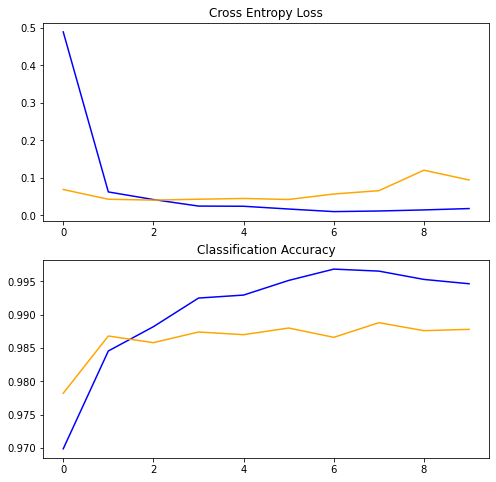

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [4]:
model= load_model('bestmodel.h5')
model.evaluate(validation_generator)

79/79 [==============================] - 23s 227ms/step - loss: 0.0658 - accuracy: 0.9888


[0.06583520025014877, 0.9887999892234802]